# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [22]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [24]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

# Save the HTML from the browser
html = browser.html


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [25]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

In [26]:
# Extract all rows of data
all_rows = soup.find_all('tr') 

for row in all_rows:
    cells = row.find_all('td')  # Assuming 'td' represents cells in a table row
    for cell in cells:
        print(cell.text)  # Print the text content of each cell


2
2012-08-16
10
155
6
-75.0
739.0
13
2012-08-17
11
156
6
-76.0
740.0
24
2012-08-18
12
156
6
-76.0
741.0
35
2012-08-19
13
157
6
-74.0
732.0
46
2012-08-20
14
157
6
-74.0
740.0
57
2012-08-21
15
158
6
-78.0
740.0
68
2012-08-22
16
158
6
-77.0
740.0
79
2012-08-23
17
159
6
-76.0
742.0
112
2012-08-27
21
161
6
-74.0
741.0
114
2012-08-28
22
162
6
-74.0
742.0
123
2012-08-29
23
162
6
-75.0
741.0
134
2012-08-30
24
163
6
-75.0
742.0
145
2012-08-31
25
163
6
-75.0
743.0
156
2012-09-01
26
164
6
-76.0
745.0
163
2012-09-02
27
164
6
-75.0
743.0
170
2012-09-03
28
165
6
-75.0
745.0
171
2012-09-04
29
166
6
-75.0
747.0
172
2012-09-05
30
166
6
-74.0
747.0
173
2012-09-06
31
167
6
-74.0
745.0
175
2012-09-08
33
168
6
-73.0
748.0
176
2012-09-10
34
168
6
-73.0
748.0
177
2012-09-11
35
169
6
-73.0
749.0
178
2012-09-12
36
169
6
-73.0
750.0
179
2012-09-13
37
170
6
-73.0
750.0
180
2012-09-14
38
171
6
-73.0
750.0
181
2012-09-15
39
171
6
-75.0
751.0
182
2012-09-16
40
172
6
-75.0
753.0
183
2012-09-17
41
172
6
-75.0
753.0
1

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [27]:
# Create an empty list
data_list = []

# Loop through the scraped data to create a list of rows
for row in all_rows:
    cells = row.find_all('td')  # Assuming 'td' represents cells in a table row
    row_data = []
    for cell in cells:
        row_data.append(cell.text)
    data_list.append(row_data)


In [28]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_headings = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df = pd.DataFrame(data_list, columns=column_headings)

# Display the DataFrame
print(df)


        id terrestrial_date   sol    ls month min_temp pressure
0     None             None  None  None  None     None     None
1        2       2012-08-16    10   155     6    -75.0    739.0
2       13       2012-08-17    11   156     6    -76.0    740.0
3       24       2012-08-18    12   156     6    -76.0    741.0
4       35       2012-08-19    13   157     6    -74.0    732.0
...    ...              ...   ...   ...   ...      ...      ...
1863  1889       2018-02-23  1973   133     5    -78.0    730.0
1864  1892       2018-02-24  1974   134     5    -77.0    729.0
1865  1894       2018-02-25  1975   134     5    -76.0    729.0
1866  1893       2018-02-26  1976   135     5    -77.0    728.0
1867  1895       2018-02-27  1977   135     5    -77.0    727.0

[1868 rows x 7 columns]


In [29]:
# Confirm DataFrame was created successfully


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [30]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [31]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                         object
ls                          object
month                       object
min_temp                   float64
pressure                   float64
dtype: object


In [32]:
# Confirm type changes were successful by examining data types again


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [33]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print("Number of unique months on Mars:", num_months)

Number of unique months on Mars: 12


In [34]:
# 2. How many Martian days' worth of data are there?
num_martian_days = df['sol'].nunique()
print("Number of Martian days' worth of data:", num_martian_days)

Number of Martian days' worth of data: 1867


In [38]:
# 3. What is the average low temperature by month?
# Define the correct order of months (1 to 12)
ordered_months = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

# Reindex the average low temperatures by month based on the ordered list of months
average_low_temp_by_month_ordered = average_low_temp_by_month.reindex(ordered_months)

# Print the ordered average low temperature by month
print("Average low temperature by month (Ordered 1-12):")
print(average_low_temp_by_month_ordered)

Average low temperature by month (Ordered 1-12):
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


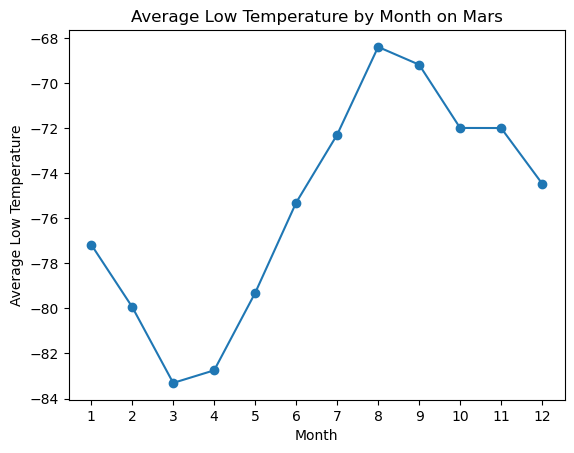

In [40]:
# Create a line plot for the average temperature by month
average_low_temp_by_month_ordered.plot(kind='line', marker='o')

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Average Low Temperature')
plt.title('Average Low Temperature by Month on Mars')

# Set the x-axis labels to the ordered months
plt.xticks(range(len(ordered_months)), ordered_months)

# Display the plot
plt.show()

In [41]:
# Identify the coldest and hottest months in Curiosity's location
# Find the coldest month
coldest_month = average_low_temp_by_month_ordered.idxmin()

# Find the hottest month
hottest_month = average_low_temp_by_month_ordered.idxmax()

print("Coldest month at Curiosity's location:", coldest_month)
print("Hottest month at Curiosity's location:", hottest_month)

Coldest month at Curiosity's location: 3
Hottest month at Curiosity's location: 8


In [45]:
# 4. Average pressure by Martian month
# Define the correct order of months (1 to 12)
ordered_months = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

# Reindex the average pressure values by Martian month based on the ordered list of months
average_pressure_by_month_ordered = average_pressure_by_month.reindex(ordered_months)

# Print the ordered average pressure by Martian month
print("Average pressure by Martian month (Ordered 1-12):")
print(average_pressure_by_month_ordered)

Average pressure by Martian month (Ordered 1-12):
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


In [18]:
# Plot the average pressure by month


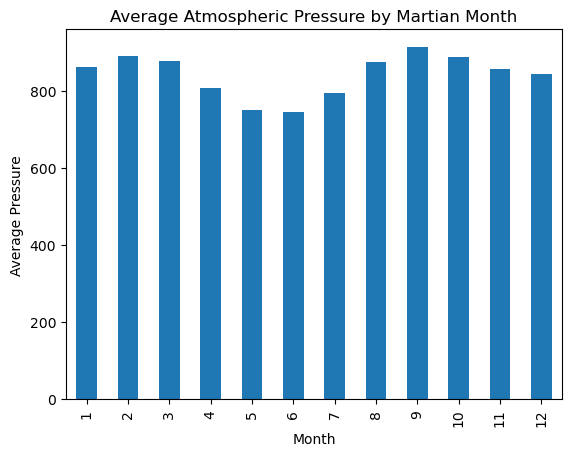

In [46]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Create a bar chart for the average pressure by Martian month
average_pressure_by_month_ordered.plot(kind='bar')

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Atmospheric Pressure by Martian Month')

# Set the x-axis labels to the ordered months
plt.xticks(range(len(ordered_months)), ordered_months)

# Display the plot
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [47]:
# Write the data to a CSV
# Define the file path to save the CSV file
file_path = "mars_weather_data.csv"

# Write the DataFrame to a CSV file
df.to_csv(file_path, index=False)

print("Data has been successfully written to", file_path)



Data has been successfully written to mars_weather_data.csv


In [21]:
browser.quit()